In [6]:
from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm
import ipywidgets
import ipdb
from plot_utils import get_model_names_for_degree

from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import basic_plot, collect_results, relevant_model_names

%matplotlib inline
%load_ext autoreload
%autoreload 2
sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "../models"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
df = read_run_dir(run_dir)

['big_lr00005' 'chebyshev_linear_regression_toy' 'curriculum'
 'decision_tree_pretrained' 'eight_to_eleven' 'four_to_eight'
 'kernel_linear_regression_toy' 'linear_regression_pretrained' 'lr00001'
 'lr00005' 'lr0005' 'lr001' 'one_to_eleven' 'one_to_four'
 'relu_2nn_regression_pretrained' 'sparse_regression_pretrained']
                                  run_id                      task  \
1   13a76f74-c060-465a-b2c5-d2467a4c4fbf  kernel_linear_regression   
4   53a1f304-84bc-4ff1-b56a-0af7b63b16fc  kernel_linear_regression   
18  51884322-51eb-4d53-82bf-37e9f71890b7  kernel_linear_regression   
16  d26ba40f-6a42-4b87-9522-9004337fdfe3  kernel_linear_regression   
11  253acdb8-dee5-4773-a53e-db780cc792c0  kernel_linear_regression   
0   fe6b9410-0bc8-4760-abc8-c062b2beace4  kernel_linear_regression   
19  ce89cfad-0ec4-474d-a649-67ec0a49cda2  kernel_linear_regression   
7   54f2f69e-0a64-471f-8576-1e719205a413  kernel_linear_regression   
17  3f2e6984-340c-472d-b982-d73c45f0eefb  kernel_

In [4]:
task = "kernel_linear_regression"

run_id='cde31f7a-93a0-4aa6-b833-37e178b50ae4'
run_path = '' # enter the path to the downloaded checkpoint folder here
metrics = get_run_metrics(run_path, include_noise=True, ground_truth_loss=True, smoothing=0.00)  # these are normally precomputed at the end of training


/home/riadoshi/CS182Project/models/kernel_linear_regression/cde31f7a-93a0-4aa6-b833-37e178b50ae4/metrics.json
{'degree-1': {'kernel_1_driver=None': {'mean': [1.3021535873413086, 0.4289124011993408, 3.5451828105104166e-12, 5.858124586550356e-14, 7.758283083894937e-14, 2.0023958822979436e-14, 1.5063339166504833e-14, 2.8530522670940084e-14, 2.3503465138214642e-14, 7.245242004006586e-14, 1.6000713259781488e-14, 3.080250220470135e-14, 1.6027262660480227e-14, 1.4903331254636706e-14, 2.3699117890569124e-14, 2.862254433032979e-14, 1.7200306730671445e-14, 1.7672273488881542e-14, 2.23274361239173e-14, 1.6151459713404336e-14, 1.4410120910109472e-14, 2.0138736869530077e-14, 1.4000655019011377e-14, 3.4622885071097786e-14, 2.890364407233739e-14, 1.8025498086347846e-14, 1.3010968170912296e-14, 1.4151849553063322e-14, 1.8907925152336115e-14, 6.694270111113829e-14, 2.5699348926060475e-14, 5.700419249046046e-14, 1.0687689780766469e-14, 1.4555951184506456e-14, 1.3229895694591431e-14, 3.1875388017011536e-

# Plot pre-computed metrics

curriculum cde31f7a-93a0-4aa6-b833-37e178b50ae4
../models/kernel_linear_regression/cde31f7a-93a0-4aa6-b833-37e178b50ae4/metrics.json
{'degree-1': {'kernel_1_driver=None': {'mean': [1.3021535873413086, 0.4289124011993408, 3.5451828105104166e-12, 5.858124586550356e-14, 7.758283083894937e-14, 2.0023958822979436e-14, 1.5063339166504833e-14, 2.8530522670940084e-14, 2.3503465138214642e-14, 7.245242004006586e-14, 1.6000713259781488e-14, 3.080250220470135e-14, 1.6027262660480227e-14, 1.4903331254636706e-14, 2.3699117890569124e-14, 2.862254433032979e-14, 1.7200306730671445e-14, 1.7672273488881542e-14, 2.23274361239173e-14, 1.6151459713404336e-14, 1.4410120910109472e-14, 2.0138736869530077e-14, 1.4000655019011377e-14, 3.4622885071097786e-14, 2.890364407233739e-14, 1.8025498086347846e-14, 1.3010968170912296e-14, 1.4151849553063322e-14, 1.8907925152336115e-14, 6.694270111113829e-14, 2.5699348926060475e-14, 5.700419249046046e-14, 1.0687689780766469e-14, 1.4555951184506456e-14, 1.3229895694591431e-1

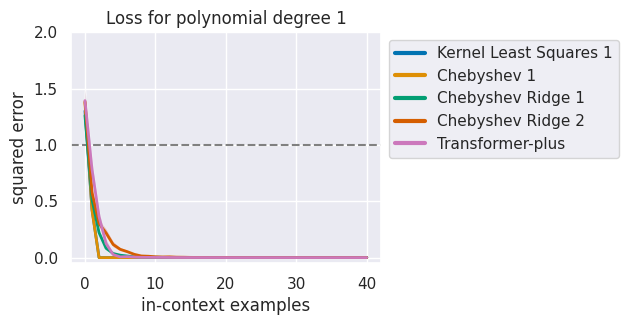

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9', 'standard'])
dict_keys(['Kernel Least Squares 2', 'Chebyshev 2', 'Chebyshev Ridge 2', 'Chebyshev Ridge 3', 'Chebyshev Ridge 1', 'Transformer-plus'])


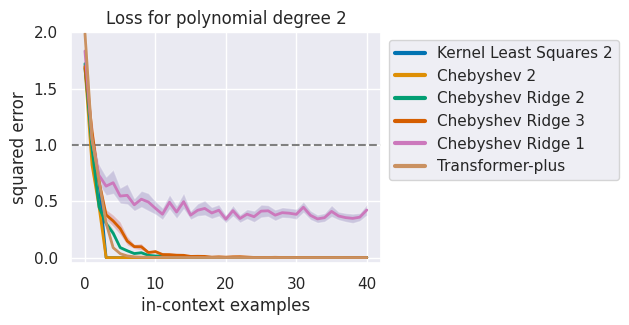

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9', 'standard'])
dict_keys(['Kernel Least Squares 3', 'Chebyshev 3', 'Chebyshev Ridge 3', 'Chebyshev Ridge 4', 'Chebyshev Ridge 2', 'Transformer-plus'])


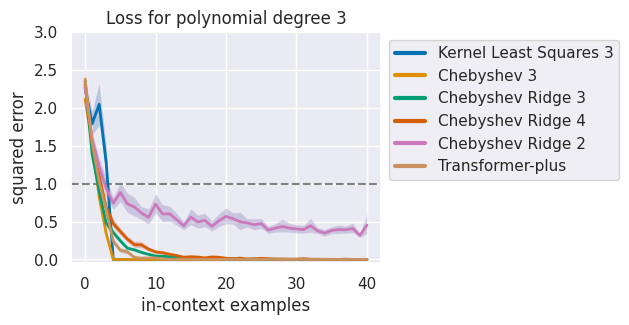

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9', 'standard'])
dict_keys(['Kernel Least Squares 4', 'Chebyshev 4', 'Chebyshev Ridge 4', 'Chebyshev Ridge 5', 'Chebyshev Ridge 3', 'Transformer-plus'])


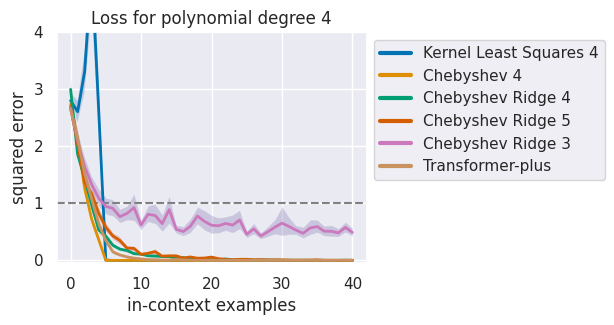

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9', 'standard'])
dict_keys(['Kernel Least Squares 5', 'Chebyshev 5', 'Chebyshev Ridge 5', 'Chebyshev Ridge 6', 'Chebyshev Ridge 4', 'Transformer-plus'])


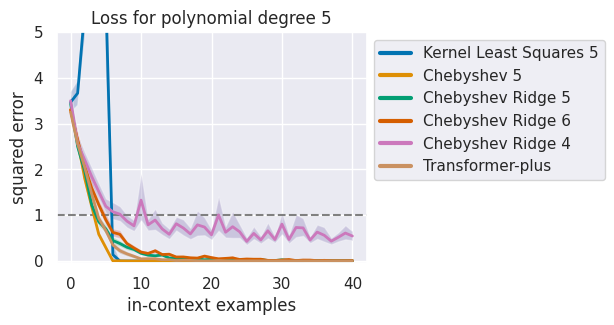

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9', 'standard'])
dict_keys(['Kernel Least Squares 6', 'Chebyshev 6', 'Chebyshev Ridge 6', 'Chebyshev Ridge 7', 'Chebyshev Ridge 5', 'Transformer-plus'])


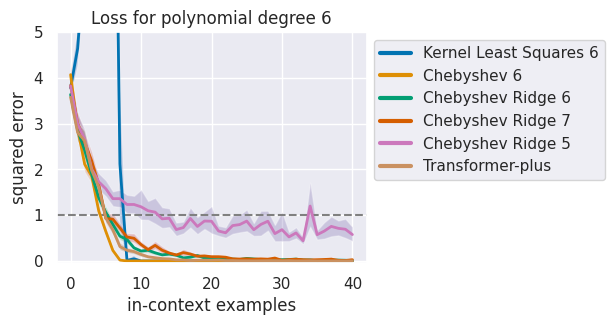

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9', 'standard'])
dict_keys(['Kernel Least Squares 7', 'Chebyshev 7', 'Chebyshev Ridge 7', 'Chebyshev Ridge 8', 'Chebyshev Ridge 6', 'Transformer-plus'])


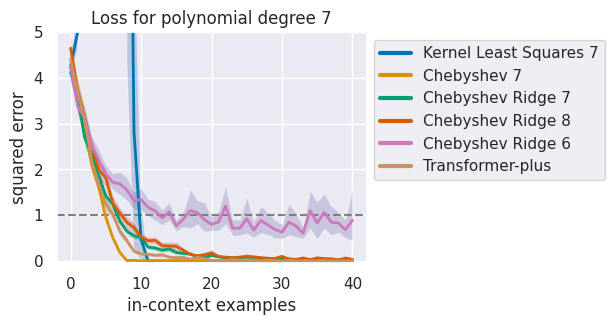

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9', 'standard'])
dict_keys(['Kernel Least Squares 8', 'Chebyshev 8', 'Chebyshev Ridge 8', 'Chebyshev Ridge 9', 'Chebyshev Ridge 7', 'Transformer-plus'])


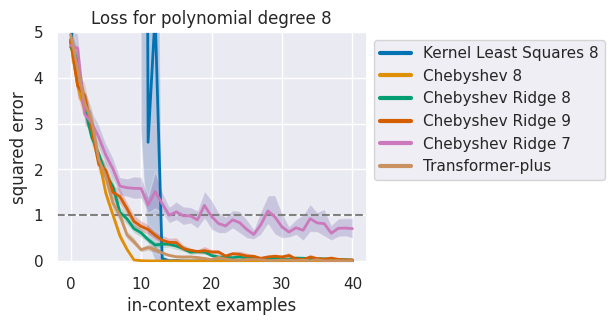

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9', 'standard'])
dict_keys(['Kernel Least Squares 9', 'Chebyshev 9', 'Chebyshev Ridge 9', 'Chebyshev Ridge 10', 'Chebyshev Ridge 8', 'Transformer-plus'])


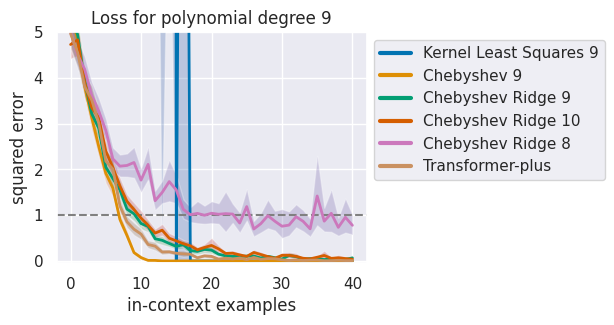

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9', 'standard'])
dict_keys(['Kernel Least Squares 10', 'Chebyshev 10', 'Chebyshev Ridge 10', 'Chebyshev Ridge 11', 'Chebyshev Ridge 9', 'Transformer-plus'])


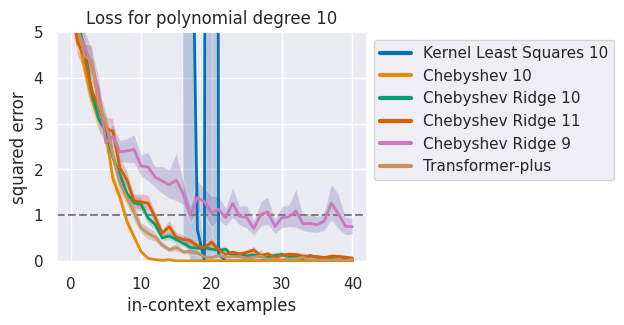

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9', 'standard'])
dict_keys(['Kernel Least Squares 11', 'Chebyshev 11', 'Chebyshev Ridge 11', 'Chebyshev Ridge 10', 'Transformer-plus'])


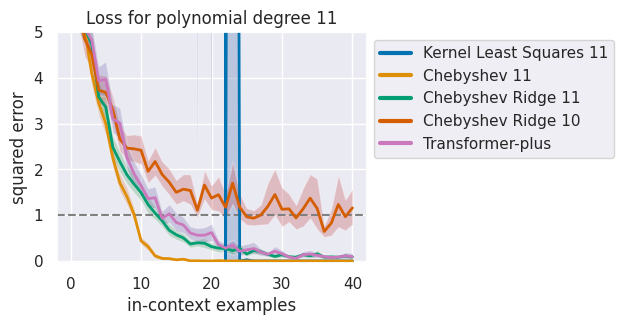

In [5]:
def valid_row(r, run_id):
    return r.task == task and r.run_id == run_id

metrics = collect_results(run_dir, df, valid_row=lambda x: valid_row(x, run_id), smoothing=0.00)
print(metrics["degree-" + str(1)])

_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims


ylims = [2, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5]
for degree in range(1, 12):
    models = get_model_names_for_degree(degree)
    print(models)
    print(metrics.keys())
    print(metrics["degree-" + str(degree)].keys())
    basic_plot(metrics["degree-" + str(degree)], models=models, ylim=ylims[degree-1])
    plt.title("Loss for polynomial degree " + str(degree))
    plt.savefig("graphs/degree-" + str(degree) + ".png", dpi=300, bbox_inches='tight')
    plt.show()